<a href="https://colab.research.google.com/github/Ifra96/820-BDP/blob/main/BDP_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 6.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [5]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving boris-speech.txt to boris-speech.txt


In [6]:
f = open("boris-speech.txt", "r") #read
print(f.read())

﻿Never in the history of our species – not since the Almighty felled the Tower of Babel – has the human race been so obsessed with one single topic of conversation. We have been following the same debates, researching the potential of the same drugs, and time and again we have been typing the same word into our search engines. COVID-19, coronavirus, has united humanity as never before.
And yet the crisis has also been an extraordinary force for division. We have all been up against the same enemy. The same tiny opponent threatening everyone in much the same way, but members of the UN have still waged 193 separate campaigns, as if every country somehow contains a different species of human being. Across the world there has been an infinite variety of curfews and restrictions and closures, and we have fought in a spirit of sauve qui peut.
And the pace has been so urgent and the pressures so intense that each national government – democracy or otherwise – has decided entirely understandab

In [8]:
import pandas as pd
df = pd.read_csv("boris-speech.txt",delimiter="\t",header=None,names=["text"])

In [9]:
df

,text
0,Never in the history of our species – not sinc...
1,And yet the crisis has also been an extraordin...
2,And the pace has been so urgent and the pressu...
3,"And after 9 months of fighting COVID-19, the v..."
4,Unless we get our act together. Unless we unit...
5,"Now is the time – therefore, here at what I de..."
6,"And with nearly a million people dead, with co..."
7,And so the UK supports the efforts of the Worl...
8,And as we now send our medical detectives to i...
9,"In the last 20 years, there have been 8 outbre..."


In [10]:
import nltk

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'like', 'un','use', 'not', 'would', 'say', 'could', 'excellency', 'one','_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [13]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
stop_words.add("like")
stop_words.add("un")
stop_words.add("general")
stop_words.add("secretary")
stop_words.add("gentlemen")
stop_words.add("ladies")
stop_words.add("president")
stop_words.add("mr")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [14]:
df

,text,token,clean
0,never in the history of our species not since ...,"[never, in, the, history, of, our, species, no...","[never, history, species, since, almighty, fel..."
1,and yet the crisis has also been an extraordin...,"[and, yet, the, crisis, has, also, been, an, e...","[yet, crisis, also, extraordinary, force, divi..."
2,and the pace has been so urgent and the pressu...,"[and, the, pace, has, been, so, urgent, and, t...","[pace, urgent, pressures, intense, national, g..."
3,and after 9 months of fighting covid 19 the ve...,"[and, after, 9, months, of, fighting, covid, 1...","[9, months, fighting, covid, 19, notion, inter..."
4,unless we get our act together unless we unite...,"[unless, we, get, our, act, together, unless, ...","[unless, get, act, together, unless, unite, tu..."
5,now is the time therefore here at what i devou...,"[now, is, the, time, therefore, here, at, what...","[time, therefore, devoutly, hope, first, last,..."
6,and with nearly a million people dead with col...,"[and, with, nearly, a, million, people, dead, ...","[nearly, million, people, dead, colossal, econ..."
7,and so the uk supports the efforts of the worl...,"[and, so, the, uk, supports, the, efforts, of,...","[uk, supports, efforts, world, health, organis..."
8,and as we now send our medical detectives to i...,"[and, as, we, now, send, our, medical, detecti...","[send, medical, detectives, interview, witness..."
9,in the last 20 years there have been 8 outbrea...,"[in, the, last, 20, years, there, have, been, ...","[last, 20, years, 8, outbreaks, lethal, virus,..."


In [15]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [16]:
df

,text,token,clean,stems
0,never in the history of our species not since ...,"[never, in, the, history, of, our, species, no...","[never, history, species, since, almighty, fel...","[never, history, species, since, almighty, fel..."
1,and yet the crisis has also been an extraordin...,"[and, yet, the, crisis, has, also, been, an, e...","[yet, crisis, also, extraordinary, force, divi...","[yet, crisis, also, extraordinary, force, divi..."
2,and the pace has been so urgent and the pressu...,"[and, the, pace, has, been, so, urgent, and, t...","[pace, urgent, pressures, intense, national, g...","[pace, urgent, pressure, intense, national, go..."
3,and after 9 months of fighting covid 19 the ve...,"[and, after, 9, months, of, fighting, covid, 1...","[9, months, fighting, covid, 19, notion, inter...","[9, month, fighting, covid, 19, notion, intern..."
4,unless we get our act together unless we unite...,"[unless, we, get, our, act, together, unless, ...","[unless, get, act, together, unless, unite, tu...","[unless, get, act, together, unless, unite, tu..."
5,now is the time therefore here at what i devou...,"[now, is, the, time, therefore, here, at, what...","[time, therefore, devoutly, hope, first, last,...","[time, therefore, devoutly, hope, first, last,..."
6,and with nearly a million people dead with col...,"[and, with, nearly, a, million, people, dead, ...","[nearly, million, people, dead, colossal, econ...","[nearly, million, people, dead, colossal, econ..."
7,and so the uk supports the efforts of the worl...,"[and, so, the, uk, supports, the, efforts, of,...","[uk, supports, efforts, world, health, organis...","[uk, support, effort, world, health, organisat..."
8,and as we now send our medical detectives to i...,"[and, as, we, now, send, our, medical, detecti...","[send, medical, detectives, interview, witness...","[send, medical, detective, interview, witness,..."
9,in the last 20 years there have been 8 outbrea...,"[in, the, last, 20, years, there, have, been, ...","[last, 20, years, 8, outbreaks, lethal, virus,...","[last, 20, years, 8, outbreak, lethal, virus, ..."


In [17]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [19]:
import matplotlib.pyplot as plt##


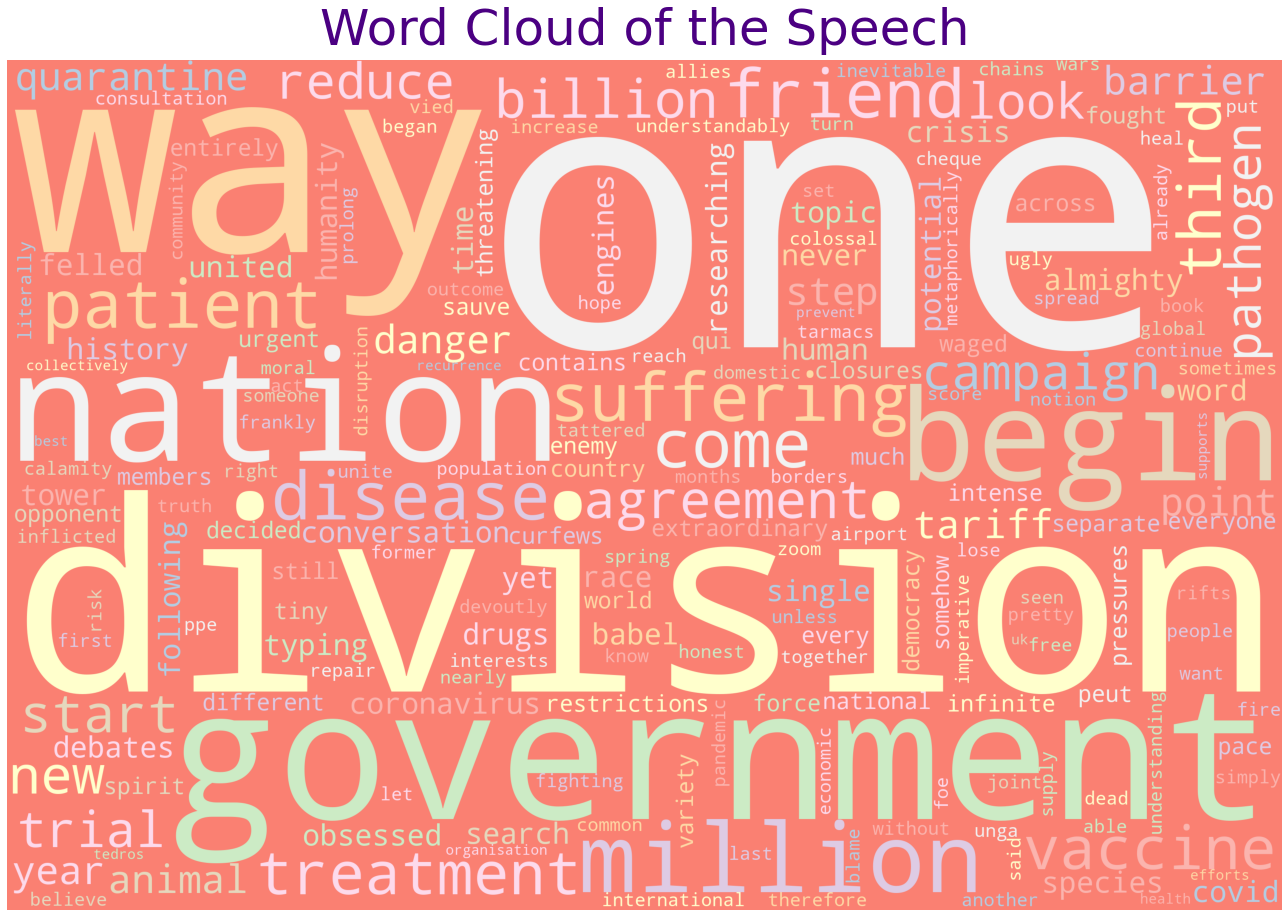

In [20]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [21]:
text_data = list(df['clean'])

In [22]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [23]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.012*"pandemic" + 0.011*"possible" + 0.009*"tariffs" + 0.009*"every" + 0.009*"still" + 0.008*"take" + 0.008*"need" + 0.007*"country" + 0.007*"heal" + 0.007*"right"'), (1, '0.021*"human" + 0.020*"19" + 0.017*"covid" + 0.012*"global" + 0.011*"race" + 0.009*"know" + 0.008*"much" + 0.007*"many" + 0.007*"animals" + 0.007*"treatment"'), (2, '0.014*"vaccine" + 0.008*"stop" + 0.008*"would" + 0.006*"trials" + 0.005*"whole" + 0.005*"doses" + 0.005*"millions" + 0.005*"safety" + 0.005*"billion" + 0.005*"successful"'), (3, '0.030*"world" + 0.026*"uk" + 0.014*"global" + 0.013*"next" + 0.011*"health" + 0.010*"country" + 0.010*"make" + 0.009*"great" + 0.008*"million" + 0.007*"could"')]


In [24]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.012*"every" + 0.012*"vaccine" + 0.012*"national" + 0.012*"supply" + 0.012*"seen" + 0.012*"nation" + 0.006*"step" + 0.006*"would" + 0.006*"might" + 0.006*"new"')
(1, '0.021*"world" + 0.018*"global" + 0.014*"one" + 0.014*"species" + 0.011*"great" + 0.011*"uk" + 0.011*"disease" + 0.011*"pathogens" + 0.011*"human" + 0.007*"next"')
(2, '0.012*"frankly" + 0.012*"looks" + 0.012*"continue" + 0.012*"9" + 0.012*"tattered" + 0.012*"fighting" + 0.012*"notion" + 0.012*"community" + 0.012*"pretty" + 0.012*"simply"')
(3, '0.018*"world" + 0.011*"uk" + 0.011*"19" + 0.011*"covid" + 0.011*"human" + 0.007*"one" + 0.007*"already" + 0.007*"found" + 0.007*"country" + 0.007*"vaccine"')
(4, '0.017*"uk" + 0.017*"vaccine" + 0.017*"gavi" + 0.017*"global" + 0.017*"another" + 0.017*"going" + 0.009*"million" + 0.009*"biggest" + 0.009*"work" + 0.009*"19"')
(5, '0.015*"would" + 0.010*"much" + 0.010*"ready" + 0.010*"unless" + 0.010*"together" + 0.010*"humanity" + 0.010*"country" + 0.010*"know" + 0.010*"possible"

In [25]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9763,"human, 19, covid, global, race, know, much, ma...","[never, history, species, since, almighty, fel..."
1,1,3.0,0.9434,"world, uk, global, next, health, country, make...","[yet, crisis, also, extraordinary, force, divi..."
2,2,0.0,0.9377,"pandemic, possible, tariffs, every, still, tak...","[pace, urgent, pressures, intense, national, g..."
3,3,1.0,0.9554,"human, 19, covid, global, race, know, much, ma...","[9, months, fighting, covid, 19, notion, inter..."
4,4,1.0,0.9653,"human, 19, covid, global, race, know, much, ma...","[unless, get, act, together, unless, unite, tu..."
5,5,0.0,0.9753,"pandemic, possible, tariffs, every, still, tak...","[time, therefore, devoutly, hope, first, last,..."
6,6,0.0,0.9801,"pandemic, possible, tariffs, every, still, tak...","[nearly, million, people, dead, colossal, econ..."
7,7,3.0,0.9819,"world, uk, global, next, health, country, make...","[uk, supports, efforts, world, health, organis..."
8,8,3.0,0.9582,"world, uk, global, next, health, country, make...","[send, medical, detectives, interview, witness..."
9,9,2.0,0.9782,"vaccine, stop, would, trials, whole, doses, mi...","[last, 20, years, 8, outbreaks, lethal, virus,..."


In [26]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9816,"pandemic, possible, tariffs, every, still, take, need, country, heal, right","[need, secure, supply, chains, still, rely, laws, comparative, advantage, invisible, hand, marke..."
1,1.0,0.9763,"human, 19, covid, global, race, know, much, many, animals, treatment","[never, history, species, since, almighty, felled, tower, babel, human, race, obsessed, one, sin..."
2,2.0,0.9782,"vaccine, stop, would, trials, whole, doses, millions, safety, billion, successful","[last, 20, years, 8, outbreaks, lethal, virus, could, escalated, pandemic, bill, gates, sounded,..."
3,3.0,0.9819,"world, uk, global, next, health, country, make, great, million, could","[uk, supports, efforts, world, health, organisation, friend, tedros, explore, aetiology, disease..."


In [27]:
pip install pyLDAvis #using plydavis to interpret topics

     |████████████████████████████████| 1.7 MB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 44.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=a93deb52b31f2a014e16f0ce5787d4dad2221e0cd78977faa6d0655d7208c304
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompat

In [28]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packag

In [29]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [30]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.38520636075238335


In [31]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [32]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,never in the history of our species not since the almighty felled the tower of babel has the hum...,"[never, in, the, history, of, our, species, not, since, the, almighty, felled, the, tower, of, b...","[never, history, species, since, almighty, felled, tower, babel, human, race, obsessed, one, sin...","[never, history, species, since, almighty, fell, tower, babel, human, race, obsess, one, single,...",-0.071429,0.348661
1,and yet the crisis has also been an extraordinary force for division we have all been up against...,"[and, yet, the, crisis, has, also, been, an, extraordinary, force, for, division, we, have, all,...","[yet, crisis, also, extraordinary, force, division, enemy, tiny, opponent, threatening, everyone...","[yet, crisis, also, extraordinary, force, division, enemy, tiny, opponent, threaten, everyone, m...",0.066667,0.346875
2,and the pace has been so urgent and the pressures so intense that each national government democ...,"[and, the, pace, has, been, so, urgent, and, the, pressures, so, intense, that, each, national, ...","[pace, urgent, pressures, intense, national, government, democracy, otherwise, decided, entirely...","[pace, urgent, pressure, intense, national, government, democracy, otherwise, decide, entirely, ...",0.090000,0.411667
3,and after 9 months of fighting covid 19 the very notion of the international community looks fra...,"[and, after, 9, months, of, fighting, covid, 19, the, very, notion, of, the, international, comm...","[9, months, fighting, covid, 19, notion, international, community, looks, frankly, pretty, tatte...","[9, month, fighting, covid, 19, notion, international, community, look, frankly, pretty, tattere...",0.112500,0.414286
4,unless we get our act together unless we unite and turn our fire against our common foe we know ...,"[unless, we, get, our, act, together, unless, we, unite, and, turn, our, fire, against, our, com...","[unless, get, act, together, unless, unite, turn, fire, common, foe, know, everyone, lose, inevi...","[unless, get, act, together, unless, unite, turn, fire, common, foe, know, everyone, lose, inevi...",-0.150000,0.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8a14e7d90>]],
      dtype=object)

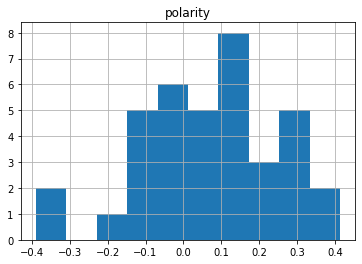

In [33]:
df.hist(column='polarity')

In [34]:
df["polarity"].mean()

0.07042736730236732

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8a1534e10>]],
      dtype=object)

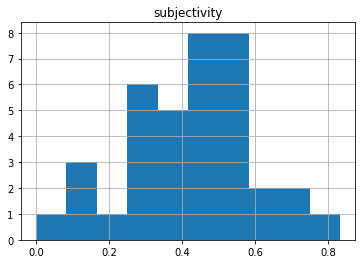

In [35]:
df.hist(column='subjectivity')

In [36]:
df["subjectivity"].mean()

0.42639032701532714

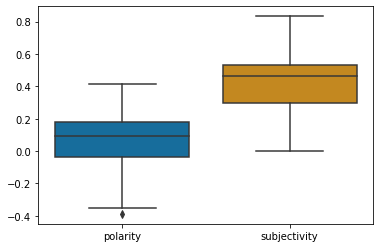

In [37]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")